In [1]:
from vacation.model import VCNN
from vacation.data import GalaxyDataset
import numpy as np
import torch

import matplotlib.pyplot as plt

rng = np.random.default_rng(1337)

In [2]:
train_ds = GalaxyDataset(
    path="/scratch/tgross/vacation_data/Galaxy10_DECals_train.h5",
    device="cuda:1",
    max_cache_size="15G",
    cache_loaded=True,
    index_collection=rng.integers(0, 16813, 10000),
)

In [3]:
# train_ds.plot_examples()

In [4]:
valid_ds = GalaxyDataset(
    path="/scratch/tgross/vacation_data/Galaxy10_DECals_valid.h5",
    device="cuda:1",
    max_cache_size="4G",
    cache_loaded=True,
    index_collection=rng.integers(0, 4204, 400),
)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Classes', ylabel='Counts'>)

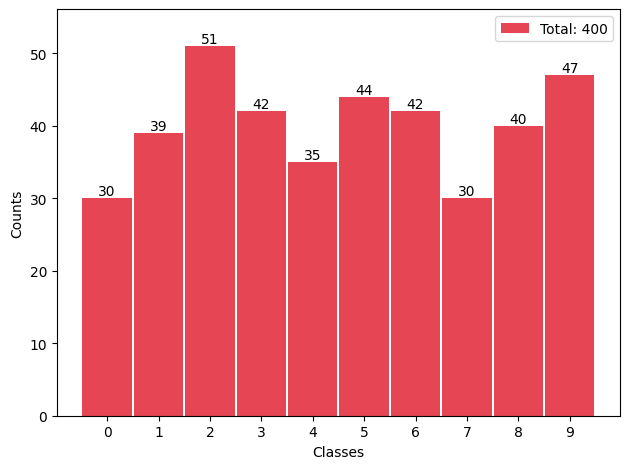

In [5]:
valid_ds.plot_distribution()

In [6]:
model = VCNN.load(
    path=".models/model_full_v2.pt",
    relative_to_package=True,
)

In [ ]:
model.summarize()

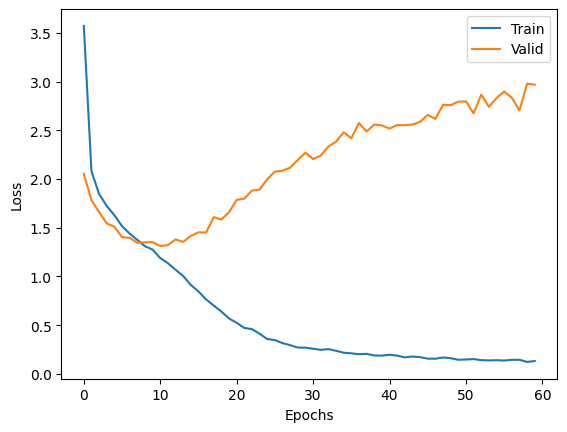

In [28]:
plt.plot(model._loss_metric.train_vals, label="Train")
plt.plot(model._loss_metric.valid_vals, label="Valid")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

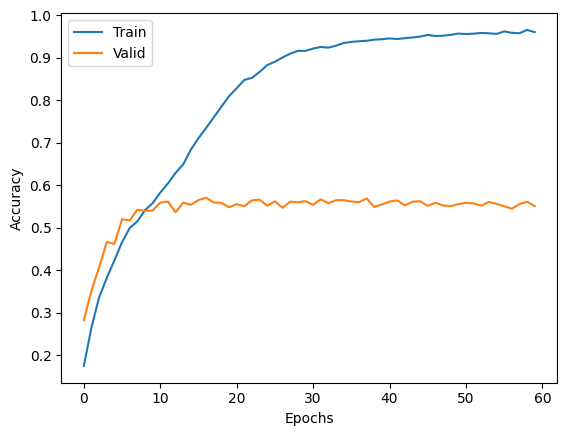

In [29]:
plt.plot(model._metrics["accuracy"].train_vals, label="Train")
plt.plot(model._metrics["accuracy"].valid_vals, label="Valid")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
from tqdm.auto import tqdm

In [ ]:
model.model.eval()
y_pred = torch.Tensor(
    [model(valid_ds[int(img)][0][None]).argmax() for img in tqdm(np.arange(0, 400))]
)

In [ ]:
cmatrix = ConfusionMatrixDisplay.from_predictions(
    y_pred=y_pred.cpu().numpy(), y_true=valid_ds.get_labels().cpu().numpy()
)

In [ ]:
print(str(model.model))

In [ ]:
print(str(model.model))

In [28]:
model.model.eval()
for i in tqdm(range(0, 400)):
    if torch.nn.Softmax(dim=1)(model(valid_ds[i][0][None])).argmax() != model(valid_ds[i][0][None]).argmax():
        print(i)

  0%|          | 0/400 [00:00<?, ?it/s]

In [29]:
%%timeit
torch.nn.Softmax(dim=1)(model(valid_ds[0][0][None])).argmax()

821 μs ± 1.28 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [30]:
%%timeit
model(valid_ds[i][0][None]).argmax()

765 μs ± 1.51 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [15]:
valid_ds[2][1]

tensor(9, device='cuda:1', dtype=torch.uint8)